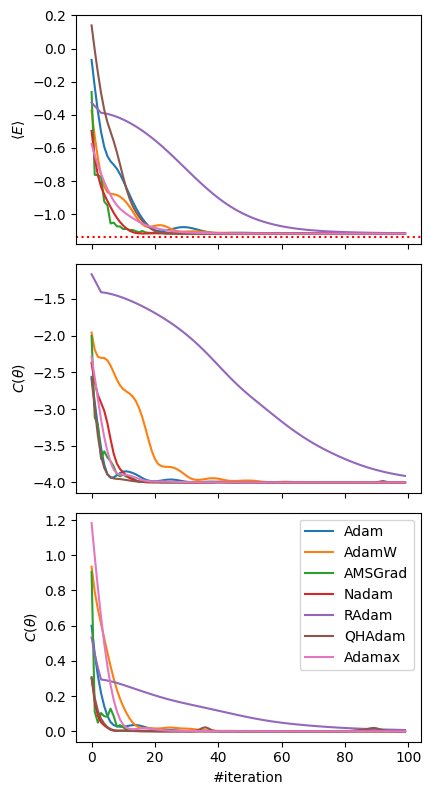

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from qoop.core import optimizer_pennylane
import pennylane as qml
optimizer_funcs = [qml.AdamOptimizer, 
             optimizer_pennylane.AdamWOptimizer,
             optimizer_pennylane.AMSGradOptimizer,
             optimizer_pennylane.NadamOptimizer,
             optimizer_pennylane.RAdamOptimizer,
             optimizer_pennylane.QHAdamOptimizer,
             optimizer_pennylane.AdamaxOptimizer]

fig, axs = plt.subplots(3, 1, figsize=(4.5, 8))

# VQE
for j, optimizer_func in enumerate(optimizer_funcs):
    costs = np.loadtxt(f"./data/loss/lossvqe_{3}qubit_{2}layer_{optimizer_func.__name__}.txt")
    axs[0].plot(costs[:100], label = optimizer_func.__name__[:-9])
E_fci = -1.136189454088
axs[0].axhline(y=E_fci, color='r', linestyle='dotted')
axs[0].set_xticklabels([])
axs[0].set_ylabel(rf'$\langle E \rangle$')
# QAOA
for j, optimizer_func in enumerate(optimizer_funcs):
    costs = np.loadtxt(f"./data/loss/lossqaoa_{4}qubit_{2}layer_{optimizer_func.__name__}.txt")
    axs[1].plot(costs[:100], label = optimizer_func.__name__[:-9])
axs[1].set_xticklabels([])
axs[1].set_ylabel(rf'$C(\theta)$')
# Dynamic
for j, optimizer_func in enumerate(optimizer_funcs):
    costs = np.loadtxt(f"./data/loss/lossdynamic_{3}qubit_{2}layer_{optimizer_func.__name__}.txt")
    axs[2].plot(costs[:100], label = optimizer_func.__name__[:-9])
axs[2].set_xlabel("#iteration")
axs[2].set_ylabel(rf'$C(\theta)$')
axs[2].legend()
plt.tight_layout()
plt.savefig("./images/compare_between_adam.svg")